# Speech To Text goal here: use speech commands dataset to build a neural network that understands simple spoken commands

In [2]:
#download the data if not yet done so
!wget "http://download.tensorflow.org/data/speech_commands_v0.01.tar.gz"

--2025-11-24 08:41:48--  http://download.tensorflow.org/data/speech_commands_v0.01.tar.gz
Resolving download.tensorflow.org (download.tensorflow.org)... 2607:f8b0:4005:811::201b, 2607:f8b0:4005:813::201b, 2607:f8b0:4005:814::201b, ...
Connecting to download.tensorflow.org (download.tensorflow.org)|2607:f8b0:4005:811::201b|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1489096277 (1.4G) [application/gzip]
Saving to: ‘speech_commands_v0.01.tar.gz’

speech_commands_v0. 100%[===================>]   1.39G  4.72MB/s    in 5m 11s  

2025-11-24 08:46:59 (4.57 MB/s) - ‘speech_commands_v0.01.tar.gz’ saved [1489096277/1489096277]



In [7]:
#Unzip the tar file
!tar -xvf 'speech_commands_v0.01.tar.gz' -C data/

x ./
x ./eight/
x ./eight/1b88bf70_nohash_0.wav
x ./eight/798f702a_nohash_2.wav
x ./eight/b12bef84_nohash_1.wav
x ./eight/05b2db80_nohash_1.wav
x ./eight/750e3e75_nohash_0.wav
x ./eight/3852fca2_nohash_0.wav
x ./eight/5ac04a92_nohash_0.wav
x ./eight/778a4a01_nohash_0.wav
x ./eight/61e50f62_nohash_0.wav
x ./eight/17c94b23_nohash_0.wav
x ./eight/037c445a_nohash_1.wav
x ./eight/11321027_nohash_0.wav
x ./eight/b97c9f77_nohash_1.wav
x ./eight/10467b06_nohash_1.wav
x ./eight/baf01c1f_nohash_0.wav
x ./eight/48bdc11c_nohash_0.wav
x ./eight/cb2929ce_nohash_4.wav
x ./eight/a6285644_nohash_2.wav
x ./eight/01b4757a_nohash_0.wav
x ./eight/ea1f888c_nohash_0.wav
x ./eight/a6285644_nohash_1.wav
x ./eight/88120683_nohash_0.wav
x ./eight/f44f440f_nohash_2.wav
x ./eight/1ecfb537_nohash_2.wav
x ./eight/7ff4fc72_nohash_0.wav
x ./eight/57b68383_nohash_2.wav
x ./eight/f0edc767_nohash_0.wav
x ./eight/50f55535_nohash_0.wav
x ./eight/cd7f8c1b_nohash_2.wav
x ./eight/98582fee_nohash_1.wav
x ./eight/b8872c20_nohas

# Import the packages

In [2]:
!pip install librosa
import os
import librosa #for audio processing, music and audio analysis
import IPython.display as ipd
import matplotlib.pyplot as plt
import numpy as np
from scipy.io import wavfile
import warnings
warnings.filterwarnings("ignore")

# Data Exploration and Visualization

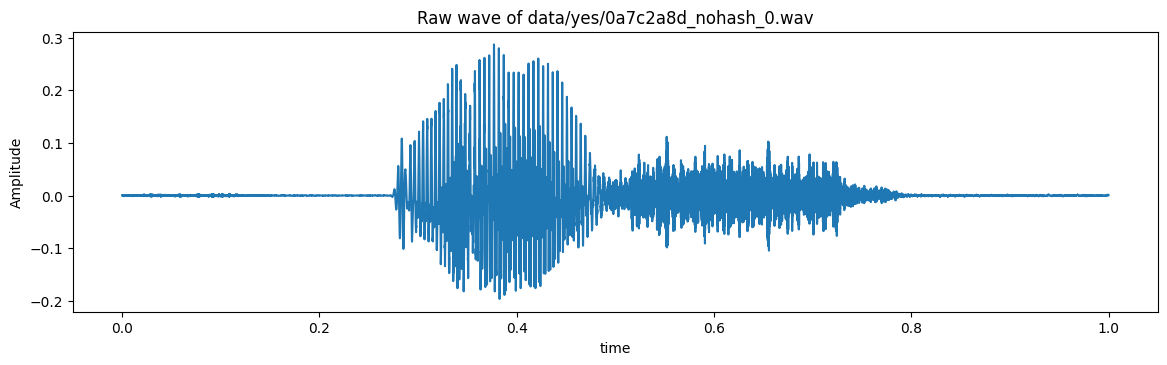

In [3]:
train_audio_path = 'data/'
samples,sample_rate = librosa.load(train_audio_path+'yes/0a7c2a8d_nohash_0.wav',sr = 16000)
fig = plt.figure(figsize = (14,8))
ax1 = fig.add_subplot(211)
ax1.set_title('Raw wave of ' + 'data/yes/0a7c2a8d_nohash_0.wav')
ax1.set_xlabel('time')
ax1.set_ylabel('Amplitude')
ax1.plot(np.linspace(0, sample_rate/len(samples), sample_rate), samples)

# Sampling rate

In [7]:
print(sample_rate)
ipd.Audio(samples,rate = sample_rate)
print(type(samples))
print(samples[:2], len(samples))

16000
<class 'numpy.ndarray'>
[ 0.00042725 -0.00021362] 16000


# Resampling

In [8]:
samples = librosa.resample(y=samples,orig_sr=sample_rate,target_sr=8000)
#resampled at 8000Hz since most speech related frequencies are present at 8kHz
ipd.Audio(samples,rate = 8000)

In [11]:
#not necessary to do this, this is just another way to play the "samples" above
!pip install ipython
import IPython
IPython.display.Audio(samples, rate = 8000)

# Number of recording of each voices

In [13]:
labels = os.listdir(train_audio_path)
labels

['right',
 'eight',
 'cat',
 'tree',
 'bed',
 'happy',
 'go',
 '.DS_Store',
 'validation_list.txt',
 'LICENSE',
 'dog',
 'no',
 'wow',
 'nine',
 'left',
 'stop',
 'three',
 '_background_noise_',
 'README.md',
 'sheila',
 'one',
 'bird',
 'zero',
 'seven',
 'up',
 'marvin',
 'two',
 'house',
 'down',
 'six',
 'yes',
 'on',
 'testing_list.txt',
 'five',
 'off',
 'four']

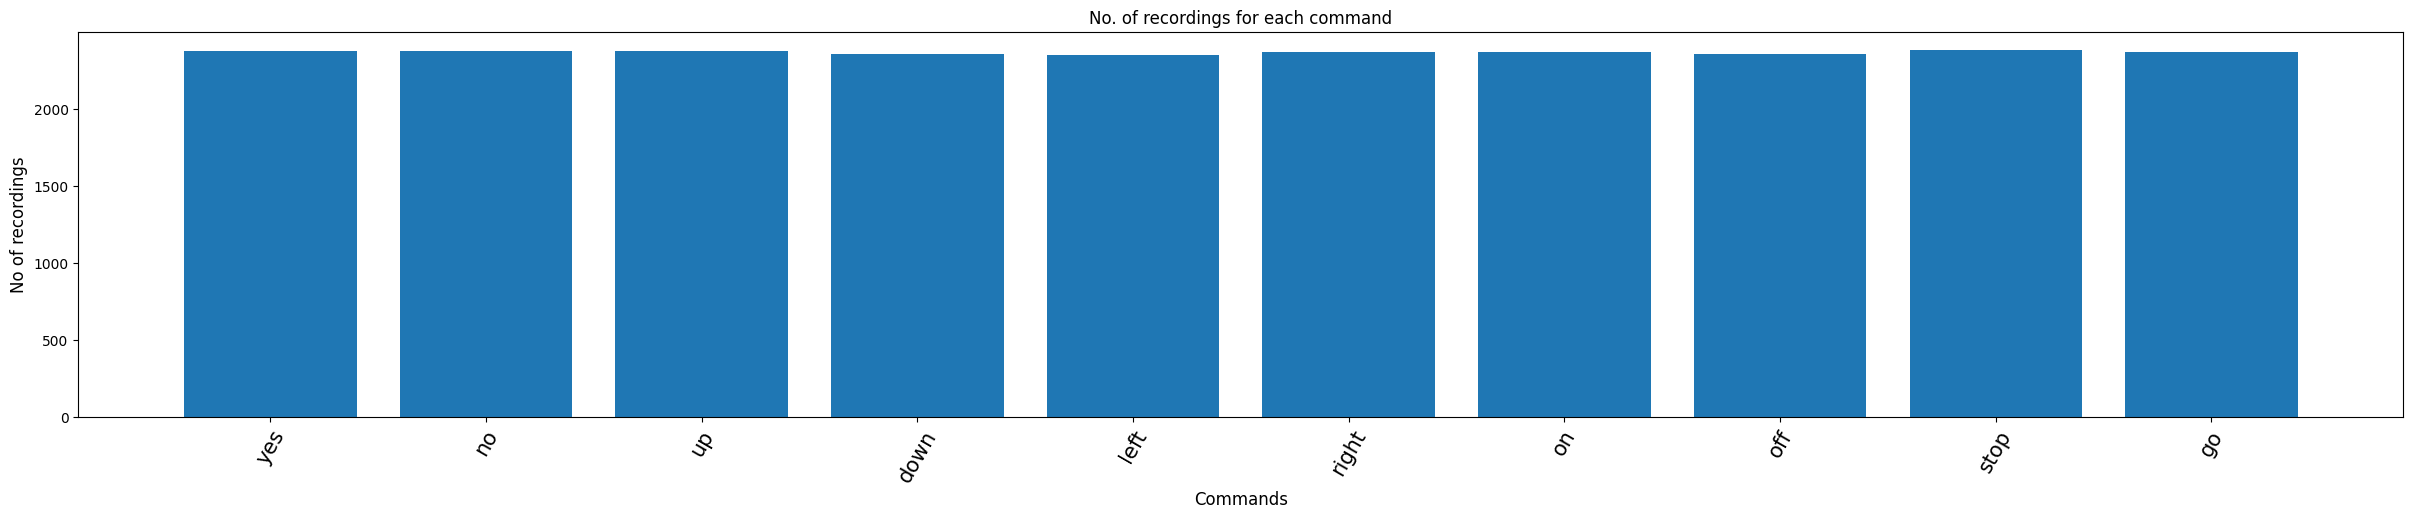

In [14]:
#labels=os.listdir(train_audio_path)
#NOT using line above as there are files/dirs in path above NOT labels
labels=["yes", "no", "up", "down", "left", "right", "on", "off", "stop", "go"] 
#note: this is a subset of all available ones that could be used

#find count of each label and plot bar graph
no_of_recordings=[]
for label in labels:
    if not os.path.isdir(train_audio_path + label): continue #actually, this check is not needed anymore
    waves = [f for f in os.listdir(train_audio_path + label) if f.endswith('.wav')]
    no_of_recordings.append(len(waves))

#plot
plt.figure(figsize=(30,5))
index = np.arange(len(labels))
plt.bar(index, no_of_recordings)
plt.xlabel('Commands', fontsize=12)
plt.ylabel('No of recordings', fontsize=12)
plt.xticks(index, labels, fontsize=15, rotation=60)
plt.title('No. of recordings for each command')
plt.show()


# Duration of recordings

(array([1.5000e+01, 3.0000e+01, 4.4000e+01, 1.3800e+02, 1.3600e+02,
        1.7900e+02, 3.6600e+02, 4.3400e+02, 5.9300e+02, 2.1747e+04]),
 array([0.418 , 0.4762, 0.5344, 0.5926, 0.6508, 0.709 , 0.7672, 0.8254,
        0.8836, 0.9418, 1.    ]),
 <BarContainer object of 10 artists>)

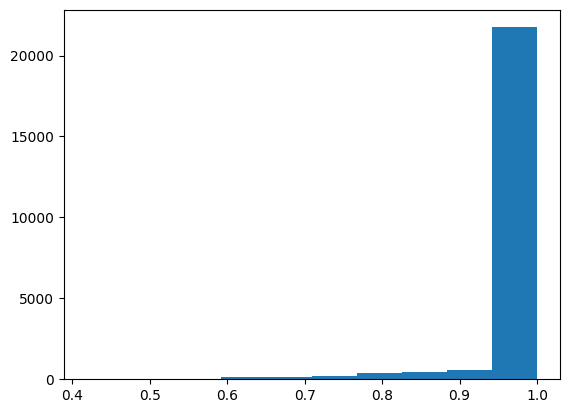

In [15]:
duration_of_recordings=[]
for label in labels:
    waves = [f for f in os.listdir(train_audio_path + '/'+ label) if f.endswith('.wav')]
    for wav in waves:
        sample_rate, samples = wavfile.read(train_audio_path + '/' + label + '/' + wav)
        duration_of_recordings.append(float(len(samples)/sample_rate))
    
plt.hist(np.array(duration_of_recordings))

# Preprocessing the audio waves - resampling and removing shorter commands

In [16]:
train_audio_path = 'data'

all_wave = []
all_label = []
for label in labels:
    print(label)
    waves = [f for f in os.listdir(train_audio_path + '/'+ label) if f.endswith('.wav')]
    for wav in waves:
        samples, sample_rate = librosa.load(train_audio_path + '/' + label + '/' + wav, sr = 16000)
        #samples = librosa.resample(samples, sample_rate, 8000) #old format no longer works
        samples = librosa.resample(y=samples,orig_sr=sample_rate,target_sr=8000)
        if(len(samples)== 8000) : 
            all_wave.append(samples)
            all_label.append(label)

yes
no
up
down
left
right
on
off
stop
go


In [17]:
#Encoding the labels
from sklearn.preprocessing import LabelEncoder
#to convert categorical labels (like text) into numerical values that machine learning models can understand
le = LabelEncoder()
y = le.fit_transform(all_label)
classes = list(le.classes_)

In [18]:
#OHE - one hot encoding
#from keras.utils import np_utils
#y = np_utils.to_categorical(y,num_classes = len(labels))
import tensorflow as tf #using this way as Keras was integrated into TF
from tensorflow.keras.utils import to_categorical
y = to_categorical(y,num_classes = len(labels))

#re-shape 2D array to 3D, which is what Conv1D further below expects
all_waves = np.array(all_wave).reshape(-1,8000,1)

2025-11-24 12:11:48.526566: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


# Split into train and validation set

In [19]:
from sklearn.model_selection import train_test_split
x_tr,x_val,y_tr,y_val = train_test_split(np.array(all_wave),np.array(y),stratify = y,test_size = 0.2,random_state=7)


# Model Architecture for this problem

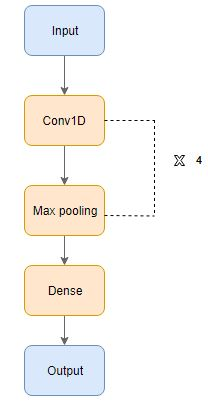

# Model building

In [20]:
from keras.layers import Dense, Dropout, Flatten, Conv1D, Input, MaxPooling1D
from keras.models import Model
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras import backend as K
K.clear_session()

inputs = Input(shape=(8000,1))

#First Conv1D layer
conv = Conv1D(8,13, padding='valid', activation='relu', strides=1)(inputs)
conv = MaxPooling1D(3)(conv)
conv = Dropout(0.3)(conv)

#Second Conv1D layer
conv = Conv1D(16, 11, padding='valid', activation='relu', strides=1)(conv)
conv = MaxPooling1D(3)(conv)
conv = Dropout(0.3)(conv)

#Third Conv1D layer
conv = Conv1D(32, 9, padding='valid', activation='relu', strides=1)(conv)
conv = MaxPooling1D(3)(conv)
conv = Dropout(0.3)(conv)

#Fourth Conv1D layer
conv = Conv1D(64, 7, padding='valid', activation='relu', strides=1)(conv)
conv = MaxPooling1D(3)(conv)
conv = Dropout(0.3)(conv)

#Flatten layer
conv = Flatten()(conv)

#Dense Layer 1
conv = Dense(256, activation='relu')(conv)
conv = Dropout(0.3)(conv)

#Dense Layer 2
conv = Dense(128, activation='relu')(conv)
conv = Dropout(0.3)(conv)

outputs = Dense(len(labels), activation='softmax')(conv)

model = Model(inputs, outputs)
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 8000, 1)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d (Conv1D)                 │ (None, 7988, 8)        │           112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ (None, 2662, 8)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 2662, 8)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_1 (Conv1D)               │ (None, 2652, 16)       │         1,424 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_1 (MaxPooling1D)  │ (None, 884, 16)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 884, 16)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_2 (Conv1D)               │ (None, 876, 32)        │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_2 (MaxPooling1D)  │ (None, 292, 32)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 292, 32)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_3 (Conv1D)               │ (None, 286, 64)        │        14,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_3 (MaxPooling1D)  │ (None, 95, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 95, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 6080)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     1,556,736 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,611,498 (6.15 MB)

 Trainable params: 1,611,498 (6.15 MB)

 Non-trainable params: 0 (0.00 B)

In [21]:
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [22]:
es = EarlyStopping(monitor = 'val_loss',mode = 'min',verbose = 1,patience = 10,min_delta = 0.0001)
#mc = ModelCheckpoint('best_model.hdf5',monitor = 'val_acc',verbose = 1,save_best_only = True,mode = 'max')
mc = ModelCheckpoint('best_model..keras',monitor = 'val_acc',verbose = 1,save_best_only = True,mode = 'max')

In [23]:
#history = model.fit(x_tr,y_tr,epochs = 100,callbacks=[es,mc],batch_size =32,validation_data = (x_val,y_val))
history = model.fit(x_tr,y_tr,epochs = 20,callbacks=[es,mc],batch_size =32,validation_data = (x_val,y_val))
#reducing #epochs for a faster experiment for now


Epoch 1/20
533/533 ━━━━━━━━━━━━━━━━━━━━ 90s 163ms/step - accuracy: 0.1532 - loss: 2.2222 - val_accuracy: 0.3284 - val_loss: 1.8139
Epoch 2/20
533/533 ━━━━━━━━━━━━━━━━━━━━ 72s 135ms/step - accuracy: 0.3741 - loss: 1.6949 - val_accuracy: 0.4485 - val_loss: 1.4980
Epoch 3/20
533/533 ━━━━━━━━━━━━━━━━━━━━ 72s 135ms/step - accuracy: 0.5574 - loss: 1.2294 - val_accuracy: 0.6620 - val_loss: 1.0511
Epoch 4/20
533/533 ━━━━━━━━━━━━━━━━━━━━ 71s 133ms/step - accuracy: 0.6580 - loss: 0.9679 - val_accuracy: 0.6568 - val_loss: 1.0537
Epoch 5/20
533/533 ━━━━━━━━━━━━━━━━━━━━ 70s 132ms/step - accuracy: 0.6941 - loss: 0.8569 - val_accuracy: 0.7096 - val_loss: 0.8547
Epoch 6/20
533/533 ━━━━━━━━━━━━━━━━━━━━ 71s 132ms/step - accuracy: 0.7200 - loss: 0.8089 - val_accuracy: 0.7603 - val_loss: 0.7205
Epoch 7/20
533/533 ━━━━━━━━━━━━━━━━━━━━ 71s 133ms/step - accuracy: 0.7468 - loss: 0.7214 - val_accuracy: 0.7577 - val_loss: 0.7056
Epoch 8/20
533/533 ━━━━━━━━━━━━━━━━━━━━ 71s 134ms/step - accuracy: 0.7663 - loss: 0

In [24]:
model.save("best_model.hdf5")

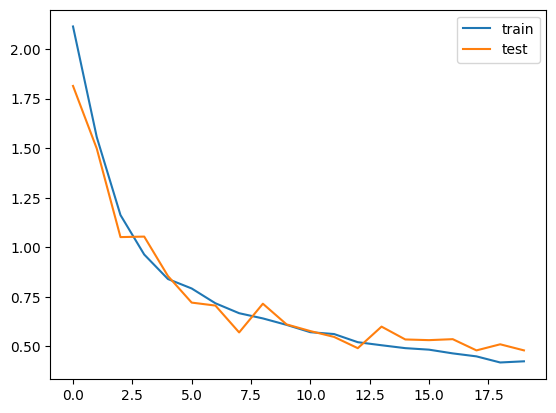

In [25]:
from matplotlib import pyplot 
pyplot.plot(history.history['loss'], label='train') 
pyplot.plot(history.history['val_loss'], label='test') 
pyplot.legend() 
pyplot.savefig("plot.jpg")
pyplot.show()

# Loading the best model

In [26]:
from keras.models import load_model
model=load_model('best_model.hdf5')
def predict(audio):
    prob=model.predict(audio.reshape(1,8000,1))
    index=np.argmax(prob[0])
    return classes[index]

In [41]:
import random
index=random.randint(0,len(x_val)-1)
samples=x_val[index].ravel()
print("Audio:",classes[np.argmax(y_val[index])])
ipd.Audio(samples, rate=8000)

Audio: right


In [42]:
print("Text:",predict(samples))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
Text: right
